In [133]:
# Import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

pd.set_option("display.max_columns", 100)

In [57]:
# test = pd.read_csv('Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Test_Features.csv')
df = pd.read_csv('Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Features.csv')
target = pd.read_csv('Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Labels.csv')

In [58]:
# test.head()

In [59]:
#test['respondent_id'].max

In [60]:
#test['employment_occupation'].value_counts()

- Per the data, these are random strings representing employment occupations. however only has 13282 values so that may limit us if we decide to use it

In [61]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [62]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


### Looking up .info to figure out what's missing in our values

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

- Seems that health insurance is missing information as well as employment_industry and employment_occupation

In [64]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [65]:
# train[train['respondent_id'] == 33444]

- Test data is  numerical values beyond 26706 from our train, these are the "respondent_id's" that we are trying to predict their vaccination status for.

### Merge Target Info to df

In [66]:
merged_df = df.merge(target, on='respondent_id')
merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [67]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

### Looking at our Target Distribution

In [68]:
target['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [69]:
target['seasonal_vaccine'].value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

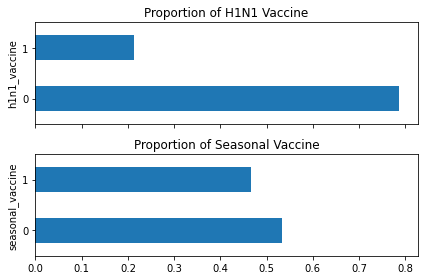

In [70]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = target.shape[0]

(target['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(target['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

- seasonal_vaccine looks to be more balanced of classes, whereas h1n1 vaccine is less balanced. Can either go with seasonal vaccine or have to address h1n1 utilizing SMOTE

In [71]:
# Wanted to see if the ID numers are organized in numerical order. Looks like they are
target['respondent_id'].describe()

count    26707.000000
mean     13353.000000
std       7709.791156
min          0.000000
25%       6676.500000
50%      13353.000000
75%      20029.500000
max      26706.000000
Name: respondent_id, dtype: float64

### Checking for duplicates in the respondent ID

In [72]:
# Are there any duplicates?
target['respondent_id'].duplicated().sum()

0

In [73]:
merged_df['respondent_id'].duplicated().sum()

0

### Further EDA of our objects to see what we can filter out

In [74]:
merged_df['age_group'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [87]:
merged_df['household_adults'].value_counts()

1.0    6435
0.0    3491
2.0    1298
3.0     570
Name: household_adults, dtype: int64

In [88]:
merged_df['household_children'].value_counts()

0.0    8345
1.0    1457
2.0    1232
3.0     760
Name: household_children, dtype: int64

In [75]:
merged_df['employment_industry'].value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [76]:
merged_df['employment_occupation'].value_counts()

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

In [77]:
merged_df['hhs_geo_region'].value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

- Don't think these three will help us too much as they are randomized strings so we will be dropping this from the dataset.

In [78]:
# Dropping employment_industry and employment occupation and hss_geo_region

merged_df = merged_df.drop(columns=['employment_occupation', 'employment_industry', 'hhs_geo_region'])
merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In [79]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

### Take a closer look at health_insurance

In [80]:
merged_df['health_insurance'].value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

- Feel like this would be important to see if this adds to vaccination rate, but it is also imbalanced. Will keep an eye on this for future in case we need to class balance.

In [81]:
merged_df = merged_df.dropna(subset=['health_insurance'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14433 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                14433 non-null  int64  
 1   h1n1_concern                 14383 non-null  float64
 2   h1n1_knowledge               14359 non-null  float64
 3   behavioral_antiviral_meds    14386 non-null  float64
 4   behavioral_avoidance         14329 non-null  float64
 5   behavioral_face_mask         14422 non-null  float64
 6   behavioral_wash_hands        14415 non-null  float64
 7   behavioral_large_gatherings  14380 non-null  float64
 8   behavioral_outside_home      14384 non-null  float64
 9   behavioral_touch_face        14364 non-null  float64
 10  doctor_recc_h1n1             14069 non-null  float64
 11  doctor_recc_seasonal         14069 non-null  float64
 12  chronic_med_condition        14300 non-null  float64
 13  child_under_6_mo

- We want to get rid of the other null values, but don't think that imputing here works as we can't simply "guess" what the values will be for this data. As the values of each column are approximately the same, we want to try dropping all the null values and see what the resulting data set will be.

In [82]:
merged_df = merged_df.dropna()

In [84]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                11794 non-null  int64  
 1   h1n1_concern                 11794 non-null  float64
 2   h1n1_knowledge               11794 non-null  float64
 3   behavioral_antiviral_meds    11794 non-null  float64
 4   behavioral_avoidance         11794 non-null  float64
 5   behavioral_face_mask         11794 non-null  float64
 6   behavioral_wash_hands        11794 non-null  float64
 7   behavioral_large_gatherings  11794 non-null  float64
 8   behavioral_outside_home      11794 non-null  float64
 9   behavioral_touch_face        11794 non-null  float64
 10  doctor_recc_h1n1             11794 non-null  float64
 11  doctor_recc_seasonal         11794 non-null  float64
 12  chronic_med_condition        11794 non-null  float64
 13  child_under_6_mo

- We are left with 11,794 values that we can work with.

### Let's try making our first simple model with Seasonal Vaccine as the target

In [85]:
# Set up our X and y

X = merged_df.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis=1)
y = merged_df['seasonal_vaccine']

In [86]:
X.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,2.0,5.0,4.0,4.0,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0


In [89]:
y.describe()

count    11794.000000
mean         0.502205
std          0.500016
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: seasonal_vaccine, dtype: float64

In [90]:
# Train test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1337)

In [91]:
X_train.shape

(8845, 33)

In [92]:
X_test.shape

(2949, 33)

### At this point, will need to One-Hot-Encode the categorical data

#### For the Training Data

In [95]:
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums, 
                       columns=ohe.get_feature_names(), 
                       index=X_train_cat.index)

In [97]:
dums_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8845 entries, 19032 to 7311
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   x0_18 - 34 Years              8845 non-null   float64
 1   x0_35 - 44 Years              8845 non-null   float64
 2   x0_45 - 54 Years              8845 non-null   float64
 3   x0_55 - 64 Years              8845 non-null   float64
 4   x0_65+ Years                  8845 non-null   float64
 5   x1_12 Years                   8845 non-null   float64
 6   x1_< 12 Years                 8845 non-null   float64
 7   x1_College Graduate           8845 non-null   float64
 8   x1_Some College               8845 non-null   float64
 9   x2_Black                      8845 non-null   float64
 10  x2_Hispanic                   8845 non-null   float64
 11  x2_Other or Multiple          8845 non-null   float64
 12  x2_White                      8845 non-null   float64
 13 

In [98]:
dums_df.head()

,x0_18 - 34 Years,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_12 Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Black,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Female,x3_Male,"x4_<= $75,000, Above Poverty","x4_> $75,000",x4_Below Poverty,x5_Married,x5_Not Married,x6_Own,x6_Rent,x7_Employed,x7_Not in Labor Force,x7_Unemployed,"x8_MSA, Not Principle City","x8_MSA, Principle City",x8_Non-MSA
19032,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10540,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
16637,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
11056,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3102,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [107]:
X_train_nums = X_train.select_dtypes('float64')

ss=StandardScaler()

ss.fit(X_train_nums)
nums_df=pd.DataFrame(ss.transform(X_train_nums),
                     columns=X_train_nums.columns,
                     index=X_train_nums.index)

In [108]:
X_train_clean = pd.concat([nums_df, dums_df], axis=1)

In [109]:
X_train_clean.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,x0_18 - 34 Years,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_12 Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Black,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Female,x3_Male,"x4_<= $75,000, Above Poverty","x4_> $75,000",x4_Below Poverty,x5_Married,x5_Not Married,x6_Own,x6_Rent,x7_Employed,x7_Not in Labor Force,x7_Unemployed,"x8_MSA, Not Principle City","x8_MSA, Principle City",x8_Non-MSA
19032,0.531779,-0.444975,-0.239017,0.604475,-0.272405,0.464191,-0.706148,-0.678094,0.686993,1.738471,1.377715,1.537244,-0.300152,-0.362042,0.368404,-0.980278,1.314066,1.271622,-0.055674,0.902966,-0.071833,-1.174002,1.621585,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10540,0.531779,-0.444975,-0.239017,-1.654327,-0.272405,-2.154285,-0.706148,-0.678094,-1.455620,-0.575218,-0.725839,-0.650515,-0.300152,-0.362042,0.368404,0.038350,-1.020321,-0.969957,-0.055674,-1.259118,-0.830022,0.126117,2.715880,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
16637,-0.596179,1.216404,-0.239017,0.604475,3.671004,0.464191,1.416134,-0.678094,0.686993,-0.575218,-0.725839,-0.650515,3.331646,2.762113,0.368404,0.038350,-1.020321,-0.222764,-0.055674,-1.259118,-0.830022,0.126117,-0.567004,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
11056,-0.596179,-0.444975,-0.239017,0.604475,-0.272405,0.464191,-0.706148,1.474721,-1.455620,-0.575218,-0.725839,-0.650515,-0.300152,-0.362042,0.368404,0.038350,1.314066,-0.969957,-0.055674,-1.259118,-0.830022,0.126117,-0.567004,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3102,-0.596179,-0.444975,-0.239017,0.604475,-0.272405,0.464191,1.416134,-0.678094,0.686993,-0.575218,-0.725839,-0.650515,-0.300152,-0.362042,-2.714410,1.056977,2.092195,1.271622,0.875203,-0.538423,-0.071833,0.126117,0.527291,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


### For the Test Data

In [110]:
X_test_cat = X_test.select_dtypes('object')

test_dums = ohe.transform(X_test_cat)
test_dums_df = pd.DataFrame(test_dums,
                           columns=ohe.get_feature_names(),
                           index=X_test_cat.index)

In [114]:
X_test_nums = X_test.select_dtypes('float64')

test_nums = ss.transform(X_test_nums)
test_nums_df = pd.DataFrame(test_nums,
                            columns=X_test_nums.columns,
                            index=X_test_nums.index)

In [115]:
X_test_clean = pd.concat([test_nums_df,
                         test_dums_df], axis=1)

In [116]:
X_test_clean.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,x0_18 - 34 Years,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_12 Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x2_Black,x2_Hispanic,x2_Other or Multiple,x2_White,x3_Female,x3_Male,"x4_<= $75,000, Above Poverty","x4_> $75,000",x4_Below Poverty,x5_Married,x5_Not Married,x6_Own,x6_Rent,x7_Employed,x7_Not in Labor Force,x7_Unemployed,"x8_MSA, Not Principle City","x8_MSA, Principle City",x8_Non-MSA
3787,0.531779,1.216404,-0.239017,-1.654327,-0.272405,0.464191,1.416134,-0.678094,0.686993,1.738471,1.377715,-0.650515,-0.300152,-0.362042,0.368404,0.038350,-0.242192,-0.222764,0.875203,0.902966,-0.071833,-1.174002,-0.567004,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
12175,-0.596179,1.216404,-0.239017,0.604475,-0.272405,0.464191,1.416134,1.474721,0.686993,-0.575218,-0.725839,-0.650515,-0.300152,-0.362042,0.368404,1.056977,-0.242192,-0.222764,0.875203,-0.538423,1.444545,0.126117,0.527291,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13246,-0.596179,1.216404,-0.239017,-1.654327,-0.272405,0.464191,-0.706148,-0.678094,0.686993,-0.575218,-0.725839,-0.650515,-0.300152,-0.362042,-2.714410,0.038350,-1.020321,-0.969957,-0.055674,-1.259118,-0.830022,1.426236,-0.567004,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
11073,0.531779,-0.444975,-0.239017,0.604475,-0.272405,0.464191,1.416134,1.474721,0.686993,-0.575218,1.377715,-0.650515,-0.300152,-0.362042,0.368404,0.038350,-0.242192,-0.222764,-0.055674,-0.538423,-0.071833,0.126117,-0.567004,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
15214,0.531779,-0.444975,-0.239017,0.604475,-0.272405,0.464191,1.416134,-0.678094,0.686993,-0.575218,-0.725839,1.537244,-0.300152,-0.362042,0.368404,0.038350,-0.242192,1.271622,-0.055674,-0.538423,-0.071833,0.126117,-0.567004,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [129]:
X_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2949 entries, 3787 to 21945
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   h1n1_concern                  2949 non-null   float64
 1   h1n1_knowledge                2949 non-null   float64
 2   behavioral_antiviral_meds     2949 non-null   float64
 3   behavioral_avoidance          2949 non-null   float64
 4   behavioral_face_mask          2949 non-null   float64
 5   behavioral_wash_hands         2949 non-null   float64
 6   behavioral_large_gatherings   2949 non-null   float64
 7   behavioral_outside_home       2949 non-null   float64
 8   behavioral_touch_face         2949 non-null   float64
 9   doctor_recc_h1n1              2949 non-null   float64
 10  doctor_recc_seasonal          2949 non-null   float64
 11  chronic_med_condition         2949 non-null   float64
 12  child_under_6_months          2949 non-null   float64
 13 

### First Simple Model: Decision Tree

In [117]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1337)

tree_clf.fit(X_train_clean, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1337)

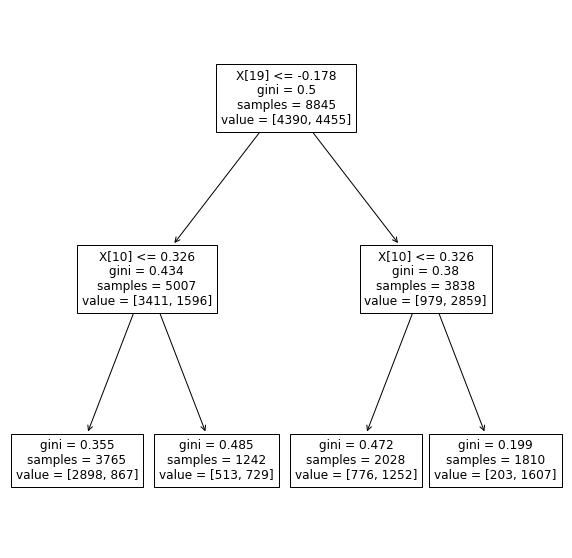

In [120]:
# Can we plot the tree?
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree_clf, ax=ax);

In [119]:
# Accuracy on Training Data and Test Data
print('Training:', tree_clf.score(X_train_clean, y_train))
print('Testing:', tree_clf.score(X_test_clean, y_test))

Training: 0.7332956472583381
Testing: 0.7331298745337402


In [134]:
y_pred = tree_clf.predict(X_test_clean)
cm_1 = confusion_matrix(y_test, y_pred)
cm_1

array([[ 971,  510],
       [ 277, 1191]])

#### Classification Metrics

In [135]:
tn = cm_1[0, 0]
fp = cm_1[0, 1]
fn = cm_1[1, 0]
tp = cm_1[1, 1]

In [136]:
# Precision, how many of the model's predictions were correct?
prec = tp / (tp + fp)
print(prec)

0.7001763668430335


### Second Model: Decision Tree with Depth = 6

In [126]:
tree_clf_2 = DecisionTreeClassifier(max_depth=3, random_state=1337)

tree_clf_2.fit(X_train_clean, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1337)

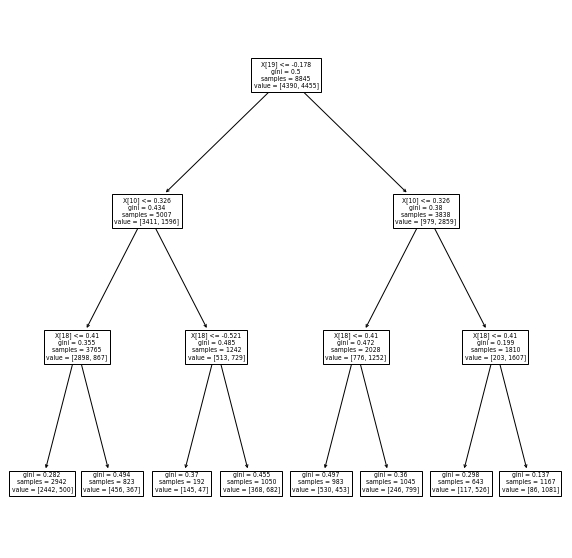

In [127]:
# Can we plot the tree?
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree_clf_2, ax=ax);

In [128]:
# Accuracy on Training Data and Test Data
print('Training:', tree_clf_2.score(X_train_clean, y_train))
print('Testing:', tree_clf_2.score(X_test_clean, y_test))

Training: 0.7530808366308649
Testing: 0.7497456765005086


In [137]:
y_pred_2 = tree_clf_2.predict(X_test_clean)
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_2

array([[1193,  288],
       [ 450, 1018]])

In [138]:
tn_2 = cm_2[0, 0]
fp_2 = cm_2[0, 1]
fn_2 = cm_2[1, 0]
tp_2 = cm_2[1, 1]

In [140]:
# Precision, how many of the model's predictions were correct?
prec_2 = tp_2 / (tp_2 + fp_2)
print(prec_2)

0.77947932618683
